## Importing the Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

## Load the Dataset

In [2]:
data = pd.read_csv('raw_crowd_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  14249 non-null  float64
 1   Latitude   14249 non-null  float64
 2   Speed      14249 non-null  float64
 3   Distance   14249 non-null  float64
 4   Time       14249 non-null  object 
 5   Acc X      14249 non-null  float64
 6   Acc Y      14249 non-null  float64
 7   Acc Z      14249 non-null  float64
 8   Heading    14249 non-null  float64
 9   gyro_x     14249 non-null  float64
 10  gyro_y     14249 non-null  float64
 11  gyro_z     14249 non-null  float64
 12  label      14249 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.4+ MB


##### Description of attributes/column
0. **Longitude**: East-west geographical position in degrees.
1. **Latitude**: North-south geographical position in degrees.
2. **Speed**: Movement rate of the device in m/s.
3. **Distance**: Total distance traveled by the device.
4. **Time**: Timestamp of when data is recorded.
5. **Acc X**: Forward-backward acceleration in m/s².
6. **Acc Y**: Left-right acceleration in m/s².
7. **Acc Z**: Up-down acceleration in m/s².
8. **Heading**: Direction of movement relative to magnetic north in degrees.
9. **Gyro_x**: Rotational velocity around the x-axis in rad/s.
10. **Gyro_y**: Rotational velocity around the y-axis in rad/s.
11. **Gyro_z**: Rotational velocity around the z-axis in rad/s.
12. **Label**: Classification indicating normal or anomalous behavior.

In [3]:
data.head()

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,18-45-12,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,18-45-12,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,18-45-13,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,18-45-13,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,18-45-13,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Longitude,14249.0,NaN,NaN,NaN,73.826564,0.003661,73.821195,73.822785,73.828663,73.829445,73.831393
Latitude,14249.0,NaN,NaN,NaN,18.508567,0.005243,18.501504,18.504085,18.50786,18.513463,18.518714
Speed,14249.0,NaN,NaN,NaN,0.771736,0.705454,0.0,0.0,0.76,1.22,2.712
Distance,14249.0,NaN,NaN,NaN,2794.960543,120586.089141,0.0,449.16122,1007.3687,1646.1915,8312031.0
Time,14249,1430,17-27-34,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acc X,14249.0,NaN,NaN,NaN,-0.001188,1.030887,-8.805807,-0.379379,-0.01309,0.36247,10.488632
Acc Y,14249.0,NaN,NaN,NaN,0.180173,0.837186,-8.476646,-0.126768,0.167153,0.478696,11.013258
Acc Z,14249.0,NaN,NaN,NaN,-0.02352,1.768632,-17.320633,-0.701353,-0.025562,0.67468,19.7258
Heading,14249.0,NaN,NaN,NaN,171.235315,105.511546,0.0,77.0,150.0,249.0,359.0
gyro_x,14249.0,NaN,NaN,NaN,-0.001316,0.141024,-2.062668,-0.04669,-0.002219,0.044939,1.611687


## Exploratory Data Analysis (EDA) and Data Preprocessing
**Objective**:
• Clean and format data, detecting missing values and outliers.
• Plot the distribution plots for all variables (Box and Whisker’s plot)


In [5]:
# Finding Null Values
data.isnull().sum()
# Outcome: No Missing Value

Longitude    0
Latitude     0
Speed        0
Distance     0
Time         0
Acc X        0
Acc Y        0
Acc Z        0
Heading      0
gyro_x       0
gyro_y       0
gyro_z       0
label        0
dtype: int64

In [6]:
# Finding duplicates
data.duplicated().sum()

np.int64(3)

In [7]:
# Removing duplicates (removing from the dataset)
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14246 entries, 0 to 14248
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  14246 non-null  float64
 1   Latitude   14246 non-null  float64
 2   Speed      14246 non-null  float64
 3   Distance   14246 non-null  float64
 4   Time       14246 non-null  object 
 5   Acc X      14246 non-null  float64
 6   Acc Y      14246 non-null  float64
 7   Acc Z      14246 non-null  float64
 8   Heading    14246 non-null  float64
 9   gyro_x     14246 non-null  float64
 10  gyro_y     14246 non-null  float64
 11  gyro_z     14246 non-null  float64
 12  label      14246 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


In [9]:
# Convert the 'Time' column to datetime (assuming 'Time' is in 'HH-MM-SS' format)
data['Time'] = pd.to_datetime(data['Time'], format='%H-%M-%S')
print(data[['Time']].head())

                 Time
0 1900-01-01 18:45:12
1 1900-01-01 18:45:12
2 1900-01-01 18:45:13
3 1900-01-01 18:45:13
4 1900-01-01 18:45:13


### Visualization

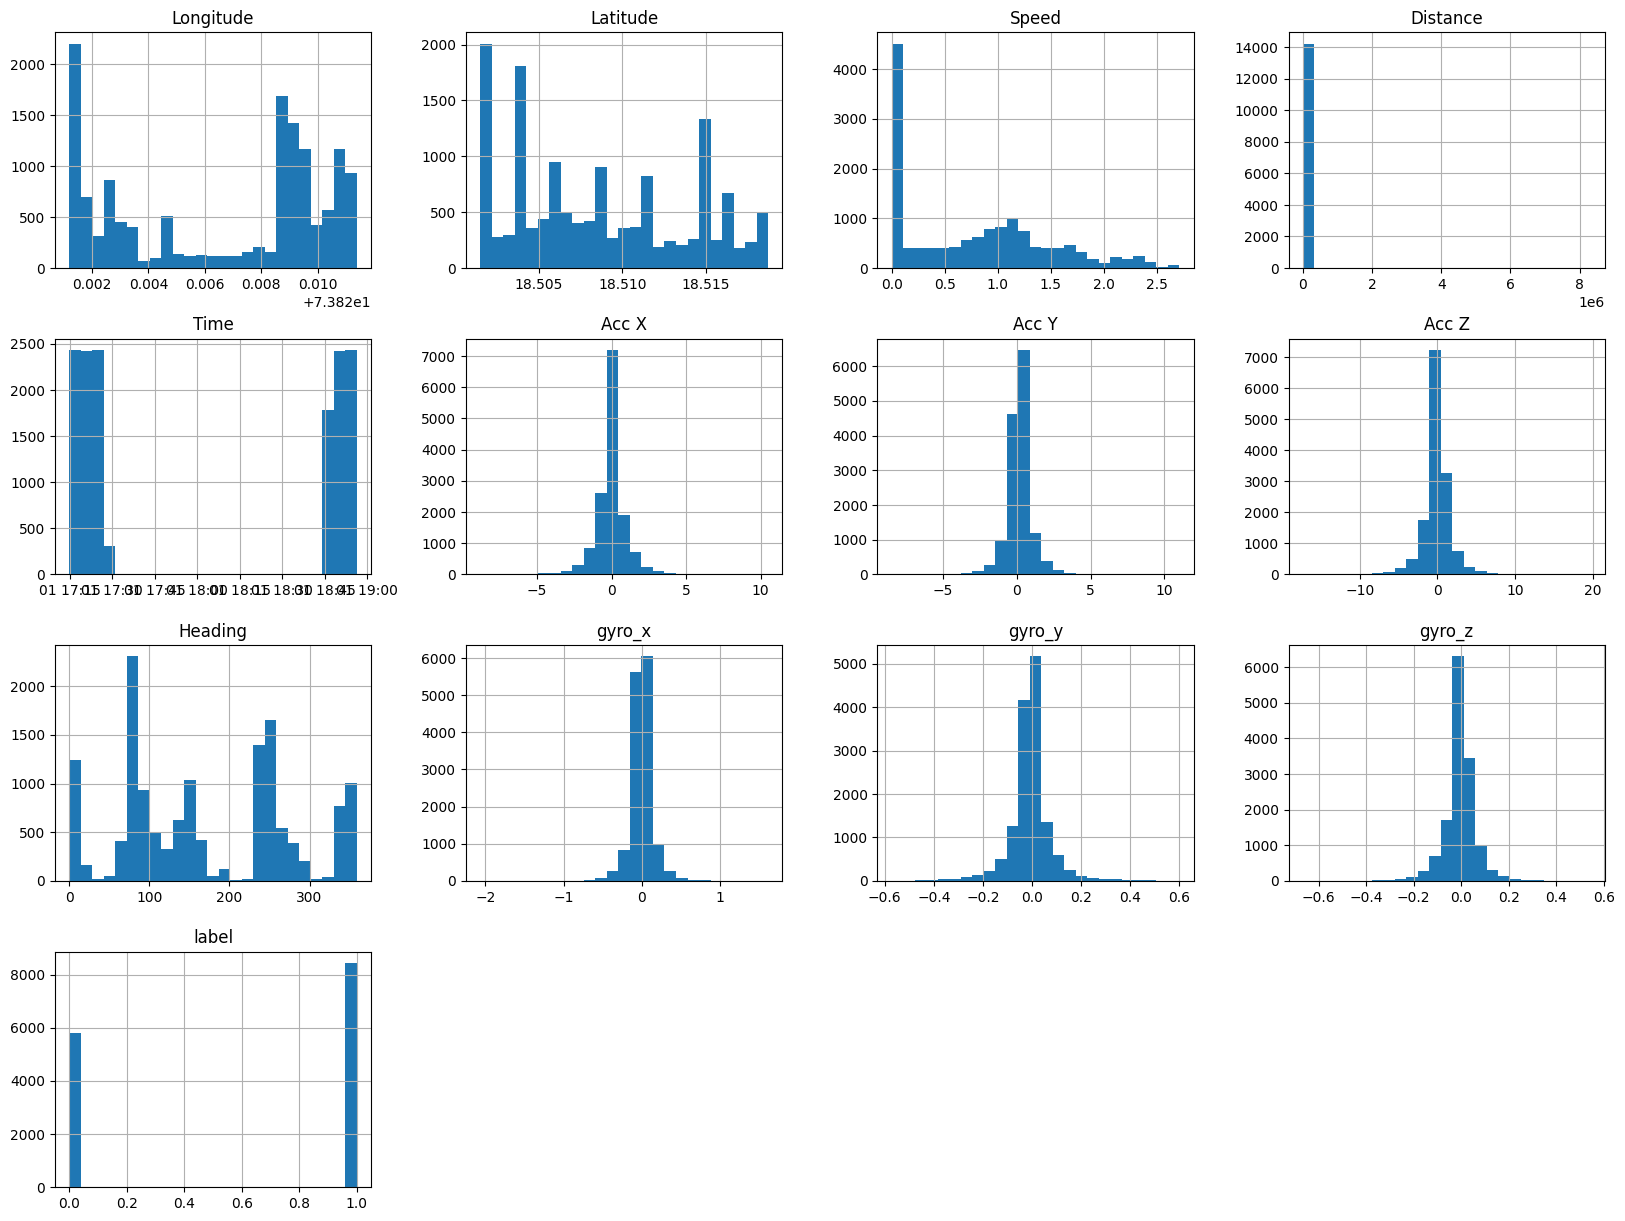

In [10]:
# Histogram
data.hist(bins=25, figsize=(20, 15))
plt.show()

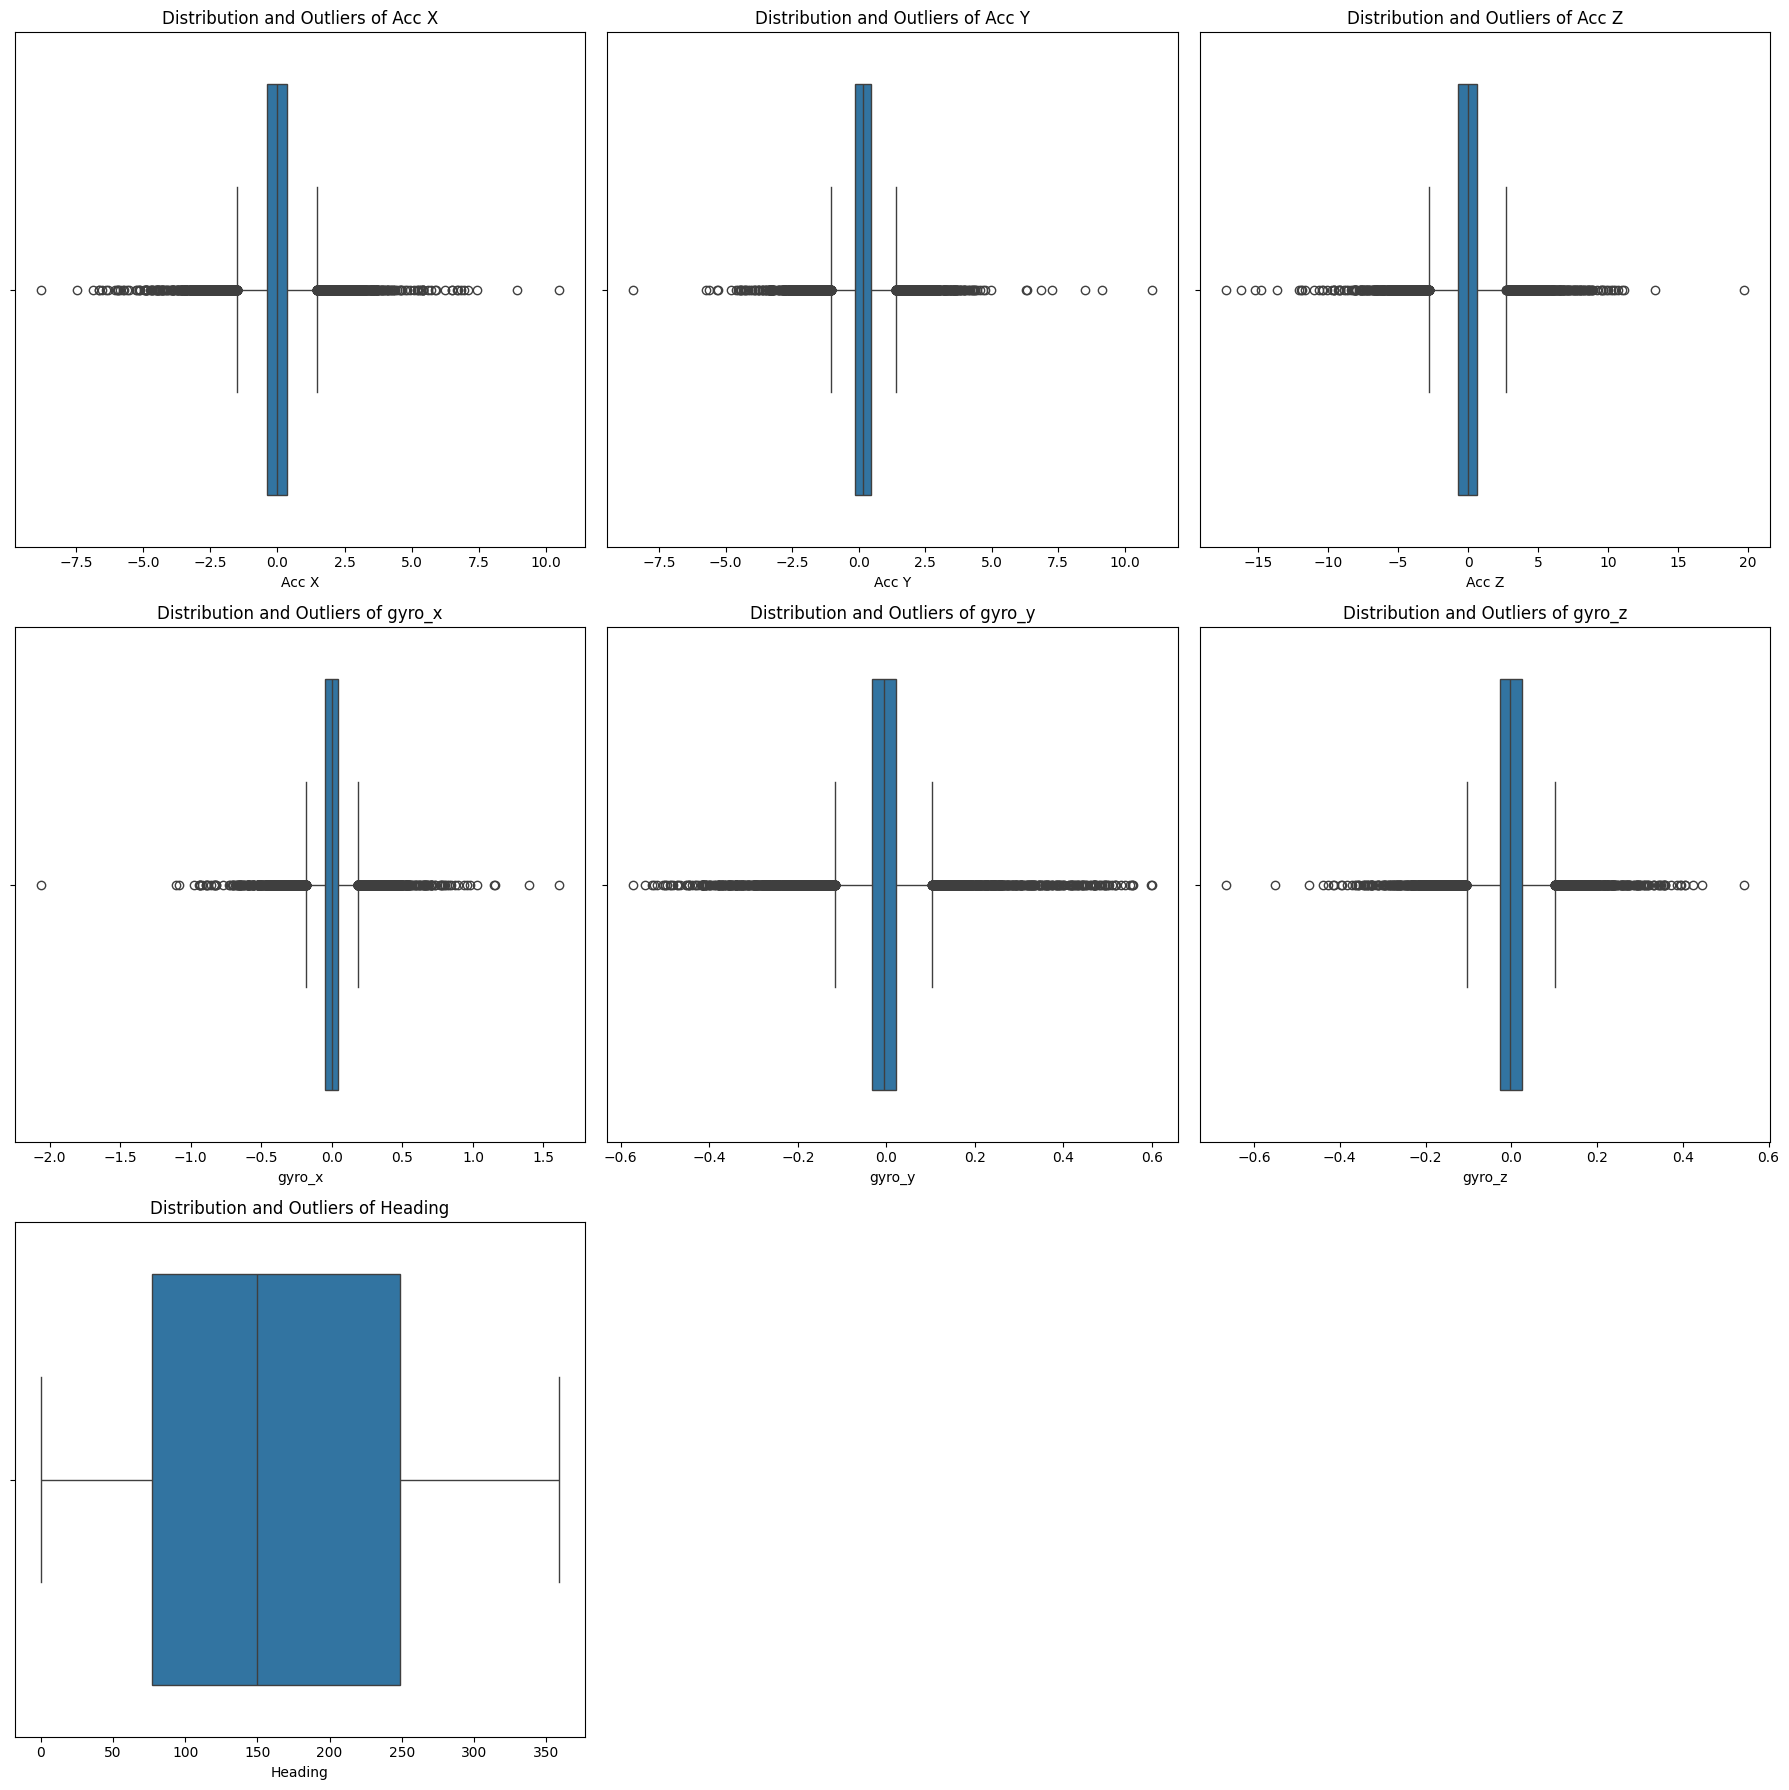

In [11]:
# Plotting the distribution and outliers in subplots
def plot_distribution_with_outliers(data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Create rows as per requirement, 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Distribution and Outliers of {col}')

    for j in range(i + 1, len(axes)):  # Hide any unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns to be plotted
columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z','Heading']
plot_distribution_with_outliers(data, columns)

### Box and Whisker Plot Description
**Box**: Shows the middle 50% of the data (interquartile range).<br>
**Median (Line in the Box)**: Represents the midpoint of the data.<br>
**Whiskers**: Indicate the range within 1.5 times the IQR, showing non-outlier data.<br>
**Outliers (Dots)**: Data points outside the whiskers, indicating anomalies or extreme values.<br>
**Title**: Identifies the sensor data being plotted (e.g., Acc X or gyro_z).

Standardizing numeric variables...
Computing correlation matrix...


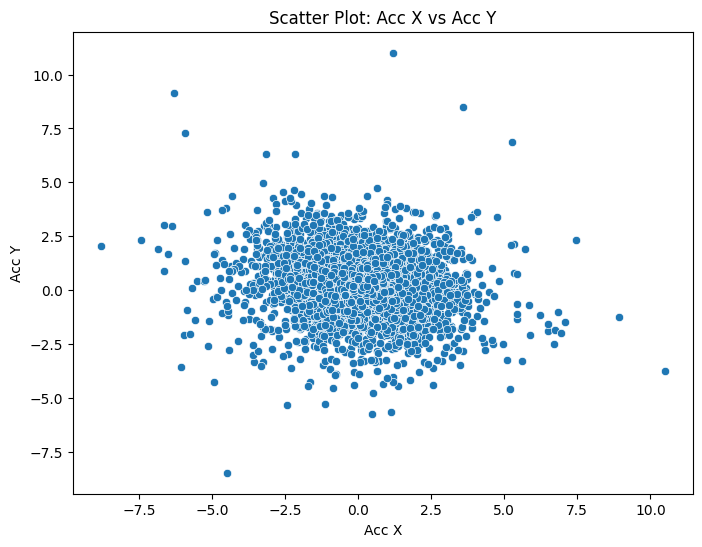

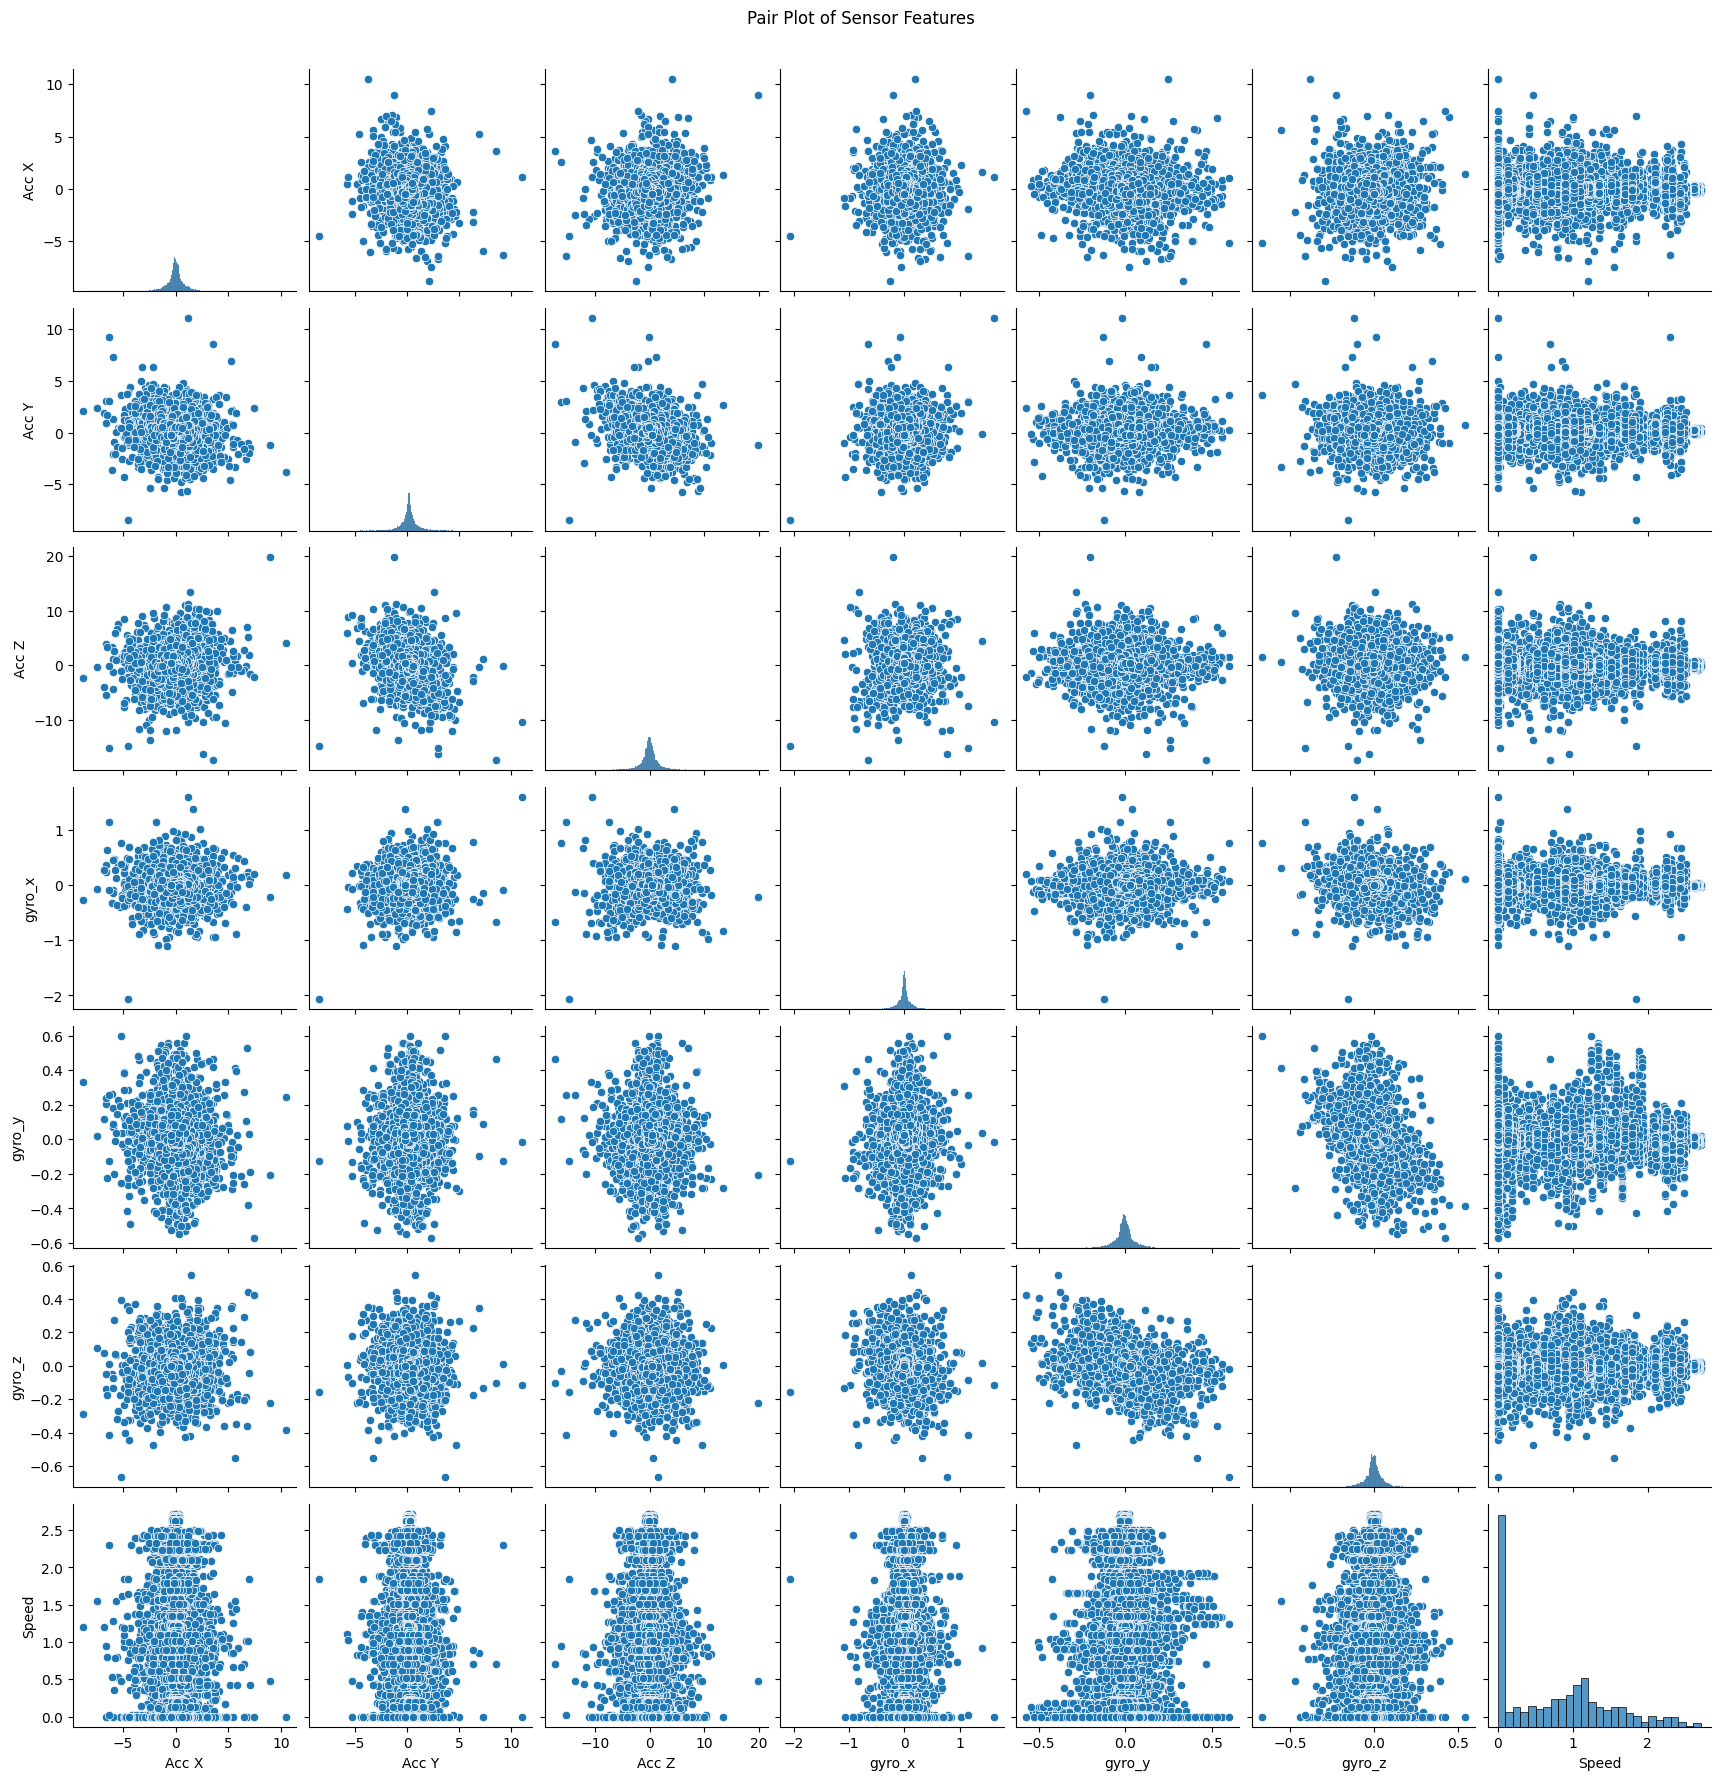

In [12]:
# Conduct Correlation Analysis

# Data Preparation - Handle missing values and standardize variables if necessary
print("Standardizing numeric variables...")
numeric_df = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Compute Correlations - Calculate pairwise correlation coefficients between all variables
print("Computing correlation matrix...")
corr_matrix = data_scaled.corr()

# Generate Scatter Plots for key variable pairs
#  Scatter Plot for Acc X vs Acc Y
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Acc X', y='Acc Y', data=data)
plt.title("Scatter Plot: Acc X vs Acc Y")
plt.xlabel('Acc X')
plt.ylabel('Acc Y')
plt.show()

# Scatter Plots for All Combinations of Features
# Create a pair plot for visualizing relationships between all pairs of features
pair_plot_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z', 'Speed']
sns.pairplot(data[pair_plot_columns])
plt.suptitle('Pair Plot of Sensor Features', y=1.02)  # Adjust title position
plt.show()

**The first scatter plot shows the relationship between acceleration in the X and Y directions. The interpretation is as follows:**<br>
1. **Clustered Points Near Center**: Indicates low acceleration in both X and Y directions.<br>
2. **No Clear Linear Relationship**: Shows independence between movements in X and Y directions.<br>
3. **Spread of Points**: Reflects variability in crowd movements along both axes.<br>
4. **Outliers at Edges**: Suggest sudden movements or potential anomalies in the crowd behavior.

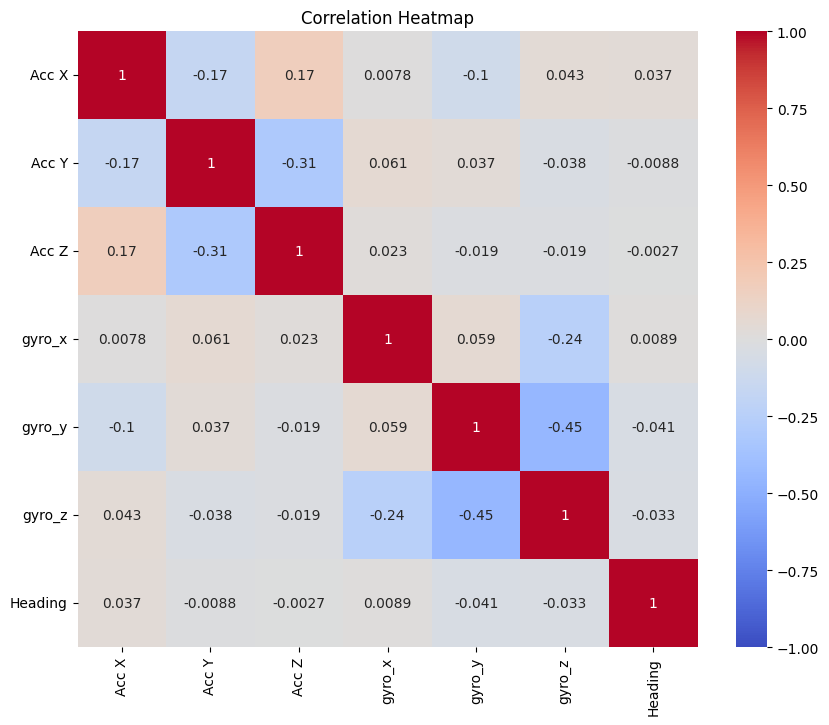

In [13]:
# Select specific columns to include in the correlation matrix
columns_of_interest = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z','Heading']
selected_df = data[columns_of_interest]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Rotate the labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title('Correlation Heatmap')
plt.show()

**The correlation matrix provides insights into the relationships between different variables. Here's how to interpret it:**<br>

1. **Diagonal Values (1.0)**: Each variable is perfectly correlated with itself.<br>
2. **High Positive Correlation (Close to 1)**: Indicates a strong positive relationship between two variables (when one increases, the other tends to increase).<br>
3. **High Negative Correlation (Close to -1)**: Shows a strong negative relationship (when one increases, the other tends to decrease).<br>
4. **Near-Zero Correlation**: Suggests little to no linear relationship between the variables.<br>

In the context of sensor data, this could indicate how movement in one axis relates to others or if certain anomalies are linked.

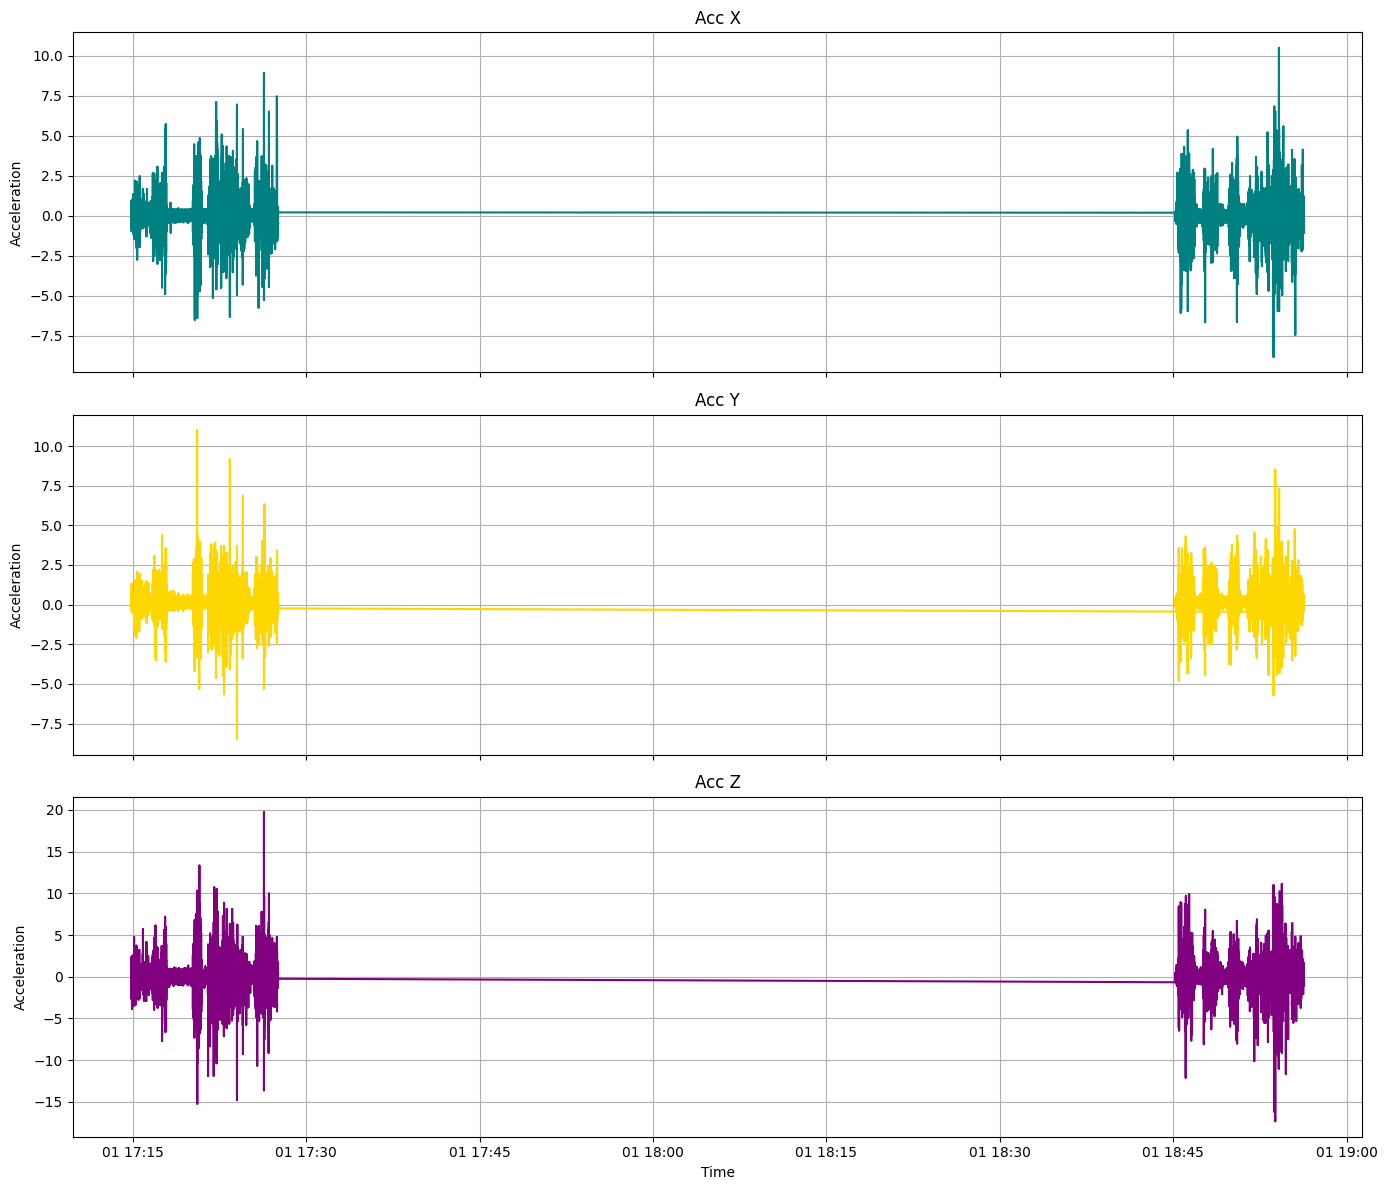

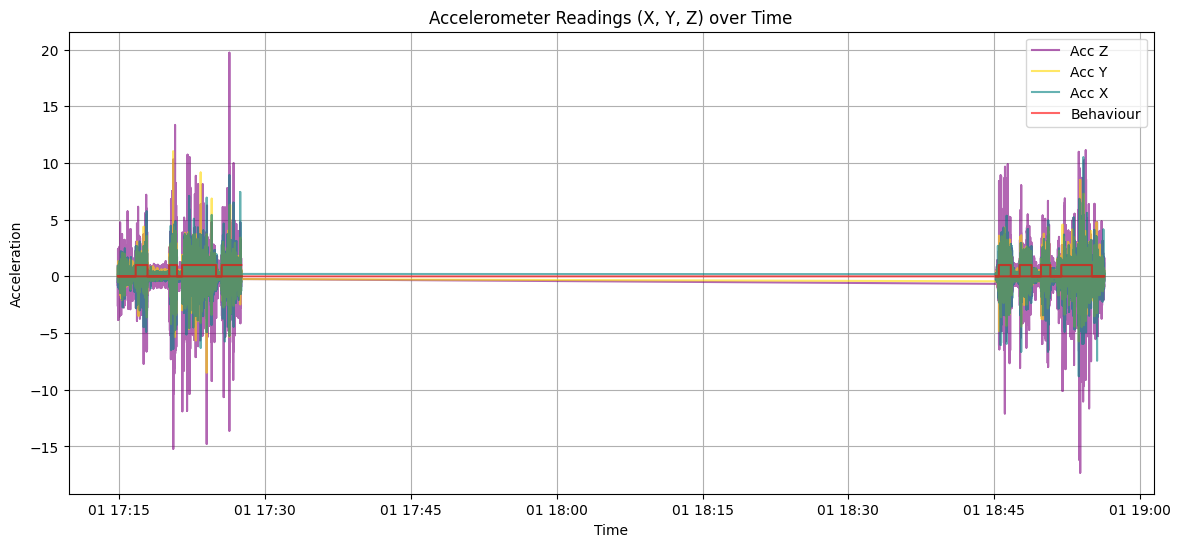

In [14]:
# Time-Series Visulaization 

# Individual Time-Series Graphs for Each Accelerometer Axes
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

axes[0].plot(data['Time'], data['Acc X'], label='Acc X', color='teal')
axes[0].set_title('Acc X')
axes[0].set_ylabel('Acceleration')
axes[0].grid(True)

axes[1].plot(data['Time'], data['Acc Y'], label='Acc Y', color='gold')
axes[1].set_title('Acc Y')
axes[1].set_ylabel('Acceleration')
axes[1].grid(True)

axes[2].plot(data['Time'], data['Acc Z'], label='Acc Z', color='purple')
axes[2].set_title('Acc Z')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Acceleration')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Combined Time-Series Graph for Accelerometer Axes
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['Acc Z'], label='Acc Z', color='purple', alpha=0.6)
plt.plot(data['Time'], data['Acc Y'], label='Acc Y', color='gold', alpha=0.6)
plt.plot(data['Time'], data['Acc X'], label='Acc X', color='teal', alpha=0.6)
plt.plot(data['Time'], data['label'], label='Behaviour', color='red', alpha=0.6)
plt.title('Accelerometer Readings (X, Y, Z) over Time')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.grid(True)
plt.legend()
plt.show()


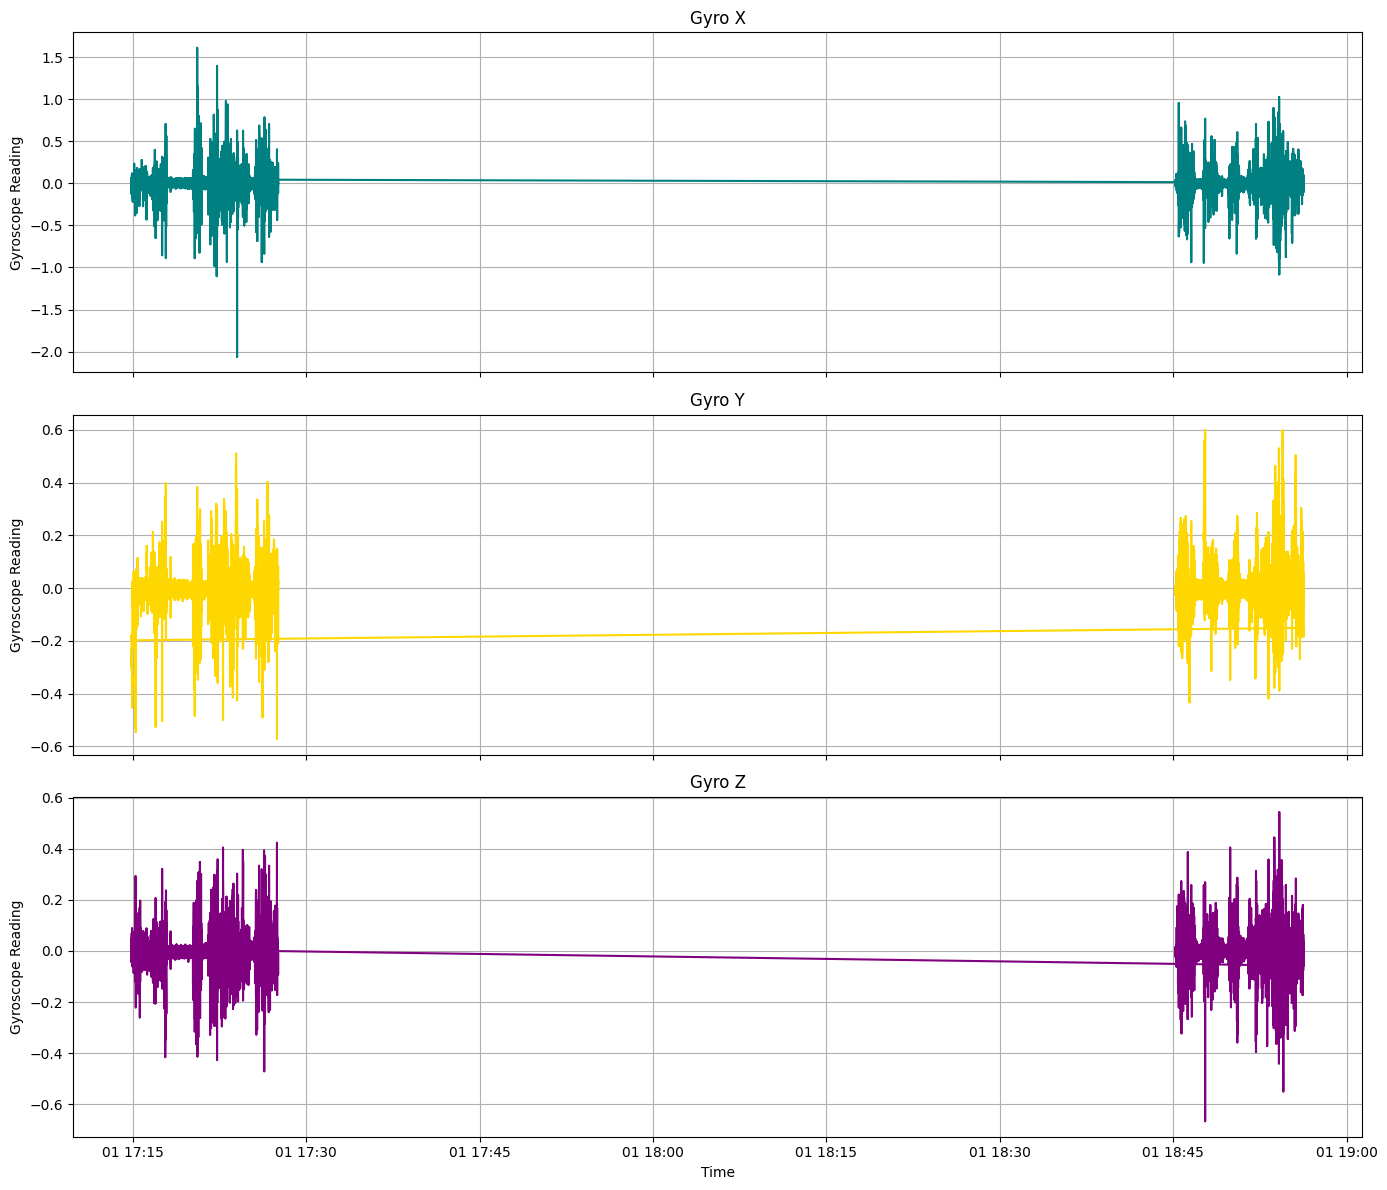

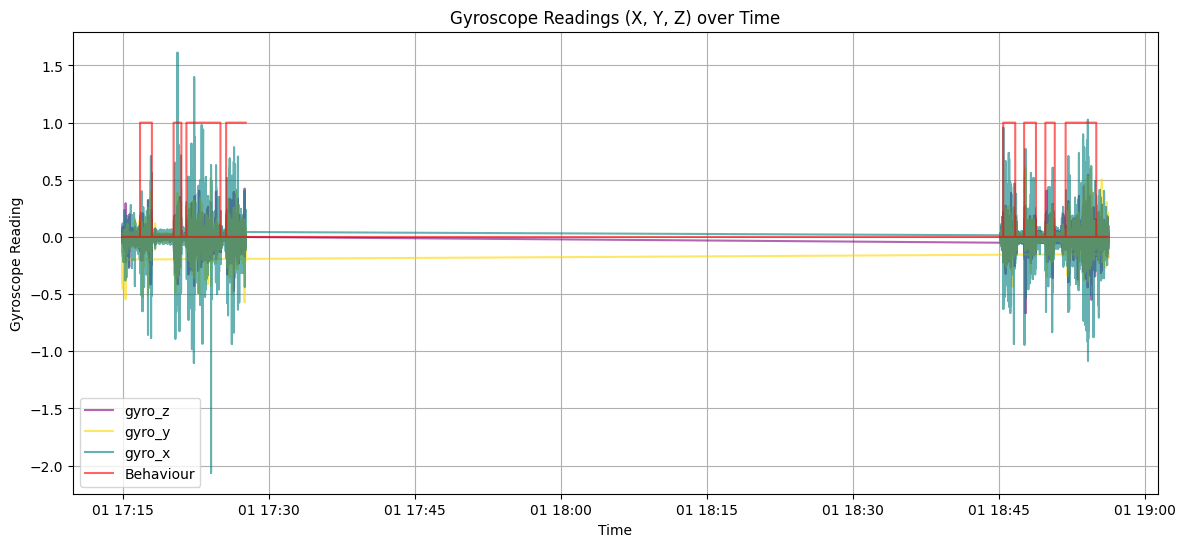

In [15]:
# Individual Time-Series Graphs for Each Gyroscope Axis
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

axes[0].plot(data['Time'], data['gyro_x'], label='gyro_x', color='teal')
axes[0].set_title('Gyro X')
axes[0].set_ylabel('Gyroscope Reading')
axes[0].grid(True)

axes[1].plot(data['Time'], data['gyro_y'], label='gyro_y', color='gold')
axes[1].set_title('Gyro Y')
axes[1].set_ylabel('Gyroscope Reading')
axes[1].grid(True)

axes[2].plot(data['Time'], data['gyro_z'], label='gyro_z', color='purple')
axes[2].set_title('Gyro Z')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Gyroscope Reading')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Combined Time-Series Graph for Gyroscope Axes
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['gyro_z'], label='gyro_z', color='purple', alpha=0.6)
plt.plot(data['Time'], data['gyro_y'], label='gyro_y', color='gold', alpha=0.6)
plt.plot(data['Time'], data['gyro_x'], label='gyro_x', color='teal', alpha=0.6)
plt.plot(data['Time'], data['label'], label='Behaviour', color='red', alpha=0.6)
plt.title('Gyroscope Readings (X, Y, Z) over Time')
plt.xlabel('Time')
plt.ylabel('Gyroscope Reading')
plt.grid(True)
plt.legend()
plt.show()

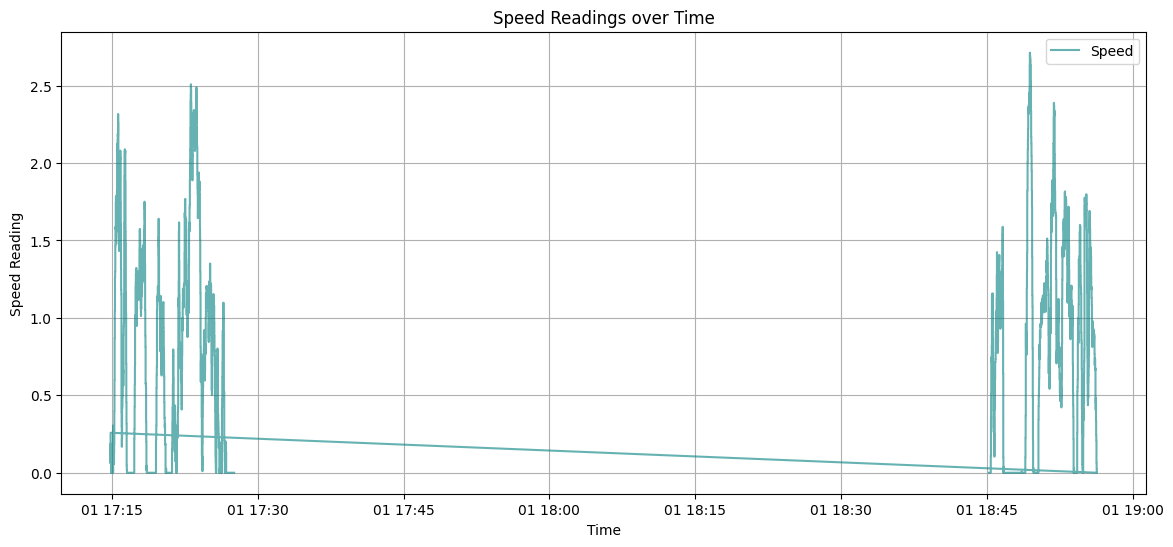

In [16]:
# Time-Series Graph for Speed Reading
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['Speed'], label='Speed', color='teal', alpha=0.6)
plt.title('Speed Readings over Time')
plt.xlabel('Time')
plt.ylabel('Speed Reading')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# Calculate the overall acceleration magnitude from the three axes (X, Y, Z)
data['Acc_Magnitude'] = np.sqrt(data['Acc X']**2 + data['Acc Y']**2 + data['Acc Z']**2)

#Calculate the change in acceleration over time to capture sudden movements
data['Acc_Change'] = data['Acc_Magnitude'].diff().fillna(0)

#Magnitude of Angular Velocity: Calculate the overall rotational velocity magnitude
data['Gyro_Magnitude'] = np.sqrt(data['gyro_x']**2 + data['gyro_y']**2 + data['gyro_z']**2)

#Change in Gyroscopic Movement: Calculate the change in rotational velocity over time
data['Gyro_Change'] = data['Gyro_Magnitude'].diff().fillna(0)

#Net Displacement: Calculate the net displacement from the change in longitude and latitude
data['Net_Displacement'] = np.sqrt((data['Longitude'].diff()**2) + (data['Latitude'].diff()**2)).fillna(0)

#Speed Change: Capture the change in speed over time to identify sudden accelerations or decelerations.
data['Speed_Change'] = data['Speed'].diff().fillna(0)

#Heading Change: Calculate the change in heading over time to identify changes in direction.
data['Heading_Change'] = data['Heading'].diff().fillna(0)

#Rolling Mean/Standard Deviation: Calculate rolling statistics to capture trends over a specified window (e.g., last 5 observations)
data['Rolling_Acc_Mean'] = data['Acc_Magnitude'].rolling(window=5).mean()
data['Rolling_Acc_STD'] = data['Acc_Magnitude'].rolling(window=5).std()

data['acc_mean'] = data[['Acc X', 'Acc Y', 'Acc Z']].mean(axis=1)
data['acc_std'] = data[['Acc X', 'Acc Y', 'Acc Z']].std(axis=1)
data['gyro_mean'] = data[['gyro_x', 'gyro_y', 'gyro_z']].mean(axis=1)
data['gyro_std'] = data[['gyro_x', 'gyro_y', 'gyro_z']].std(axis=1)


## Feature Engineering

1.**Magnitude of Acceleration**:<br>
        **Why Needed**: It combines all three acceleration components (X, Y, Z) into a single measure.<br>
    **How It Helps**: It provides a clearer view of the overall movement, helping to detect rapid changes or spikes that could indicate anomalies.<br>
2.**Change in Acceleration**:<br>
    **Why Needed**: Sudden changes in acceleration can indicate significant movements or unusual behavior.<br>
    **How It Helps**: This feature can help the model recognize moments of rapid movement or stop, which are often associated with anomalies.<br>
3.**Magnitude of Angular Velocity**:<br>
    **Why Needed**: It quantifies rotation, capturing the overall rotational motion of the device.<br>
    **How It Helps**: High values can signal unusual rotational behavior, helping to identify specific types of anomalies related to orientation.<br>
4.**Change in Gyroscopic Movement**:<br>
    **Why Needed**: Similar to acceleration, rapid changes in rotation may indicate a significant event.<br>
    **How It Helps**: This helps the model learn to detect abrupt changes in behavior, critical for identifying anomalies.<br>
5.**Net Displacement**:<br>
    **Why Needed**: It provides information about how far the device has moved, which is crucial for understanding crowd dynamics.<br>
    **How It Helps**: A sudden increase in displacement can signal an anomaly, such as a sudden rush or dispersal of the crowd.<br>
6.**Speed Change**:<br>
    **Why Needed**: Capturing acceleration or deceleration can help identify critical moments in crowd behavior.<br>
    **How It Helps**: Rapid changes in speed can indicate an impending crowd anomaly, allowing for proactive detection.<br>
7.**Heading Change**:<br>
    **Why Needed**: This measures shifts in direction, which can signify changes in crowd movement.<br>
    **How It Helps**: Understanding heading changes helps the model detect when a crowd starts to move in a different direction unexpectedly.<br>
8.**Rolling Mean/Standard Deviation**:<br>
    **Why Needed**: These statistics provide context by smoothing out fluctuations and capturing trends over time.<br>
    **How It Helps**: It helps the model discern between normal variability and true anomalies by establishing a baseline behavior.<br>

In [18]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Longitude,14246.0,73.826564,73.821195,73.822785,73.828663,73.829445,73.831393,0.003661
Latitude,14246.0,18.508567,18.501504,18.504085,18.50786,18.513463,18.518714,0.005242
Speed,14246.0,0.771898,0.0,0.0,0.76,1.22,2.712,0.705439
Distance,14246.0,2795.222874,0.0,448.081505,1007.3687,1645.653275,8312031.0,120598.784322
Time,14246,1900-01-01 18:02:59.600940544,1900-01-01 17:14:53,1900-01-01 17:20:50,1900-01-01 17:26:47,1900-01-01 18:50:21,1900-01-01 18:56:18,NaN
Acc X,14246.0,-0.001137,-8.805807,-0.37882,-0.013089,0.362683,10.488632,1.030982
Acc Y,14246.0,0.180237,-8.476646,-0.12669,0.167227,0.478868,11.013258,0.83726
Acc Z,14246.0,-0.023576,-17.320633,-0.701545,-0.025761,0.674922,19.7258,1.768811
Heading,14246.0,171.269128,0.0,77.0,150.0,249.0,359.0,105.496919
gyro_x,14246.0,-0.001319,-2.062668,-0.04669,-0.002219,0.044939,1.611687,0.141039


In [19]:
# Check for missing values in the data
print(data.isnull().sum())

Longitude           0
Latitude            0
Speed               0
Distance            0
Time                0
Acc X               0
Acc Y               0
Acc Z               0
Heading             0
gyro_x              0
gyro_y              0
gyro_z              0
label               0
Acc_Magnitude       0
Acc_Change          0
Gyro_Magnitude      0
Gyro_Change         0
Net_Displacement    0
Speed_Change        0
Heading_Change      0
Rolling_Acc_Mean    4
Rolling_Acc_STD     4
acc_mean            0
acc_std             0
gyro_mean           0
gyro_std            0
dtype: int64


In [20]:
# Filling missing values with the median of the respective columns
data['Rolling_Acc_Mean'].fillna(data['Rolling_Acc_Mean'].median(), inplace=True)
data['Rolling_Acc_STD'].fillna(data['Rolling_Acc_STD'].median(), inplace=True)

C:\Users\disha\AppData\Local\Temp\ipykernel_8340\3850705289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rolling_Acc_Mean'].fillna(data['Rolling_Acc_Mean'].median(), inplace=True)
C:\Users\disha\AppData\Local\Temp\ipykernel_8340\3850705289.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [21]:
# Check for missing values in the data
print(data.isnull().sum())

Longitude           0
Latitude            0
Speed               0
Distance            0
Time                0
Acc X               0
Acc Y               0
Acc Z               0
Heading             0
gyro_x              0
gyro_y              0
gyro_z              0
label               0
Acc_Magnitude       0
Acc_Change          0
Gyro_Magnitude      0
Gyro_Change         0
Net_Displacement    0
Speed_Change        0
Heading_Change      0
Rolling_Acc_Mean    0
Rolling_Acc_STD     0
acc_mean            0
acc_std             0
gyro_mean           0
gyro_std            0
dtype: int64


In [22]:
# Saving as CSV
data.to_csv('Featured_dataset.csv', index=False)
print("Dataset saved successfully.")

Dataset saved successfully.
